- Here I have chosen "processed.cleveland.data", "processed.hungarian.data", "processed.switzerland.data", "processed.va.data" datasets for analysis.
- I have done the most of the part with hungarian dataset.

Importing pandas

In [1]:
import pandas as pd

1. reading comma separated values
2. adding a custom 
3. identifying not available values

In [2]:
df = pd.read_csv('processed.hungarian.data', sep=',', header=None, names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'], na_values=["?"])

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


- age: age in years

- sex: sex (1 = male; 0 = female)

- cp: chest pain type
 - Value 1: typical angina
 - Value 2: atypical angina
 - Value 3: non-anginal pain
 - Value 4: asymptomatic

- trestbps: resting blood pressure (in mm Hg on admission to the hospital)

- chol: serum cholestoral in mg/dl

- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- restecg: resting electrocardiographic results
 - Value 0: normal
 - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach: maximum heart rate achieved

- exang: exercise induced angina (1 = yes; 0 = no)

- oldpeak = ST depression induced by exercise relative to rest

- slope: the slope of the peak exercise ST segment
 - Value 1: upsloping
 - Value 2: flat
 - Value 3: downsloping

- ca: number of major vessels (0-3) colored by flourosopy

- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

- num: diagnosis of heart disease (angiographic disease status)
 - Value 0: < 50% diameter narrowing
 - Value 1: > 50% diameter narrowing

In [4]:
len(df)

294

In [5]:
drop_df = df.dropna()

In [6]:
len(drop_df)

1

In [7]:
for col in df.columns:
    num_missing = df[col].isna().sum()
    print(f'The number of rows with NaN values in the "{col}" column is {num_missing}.')

The number of rows with NaN values in the "age" column is 0.
The number of rows with NaN values in the "sex" column is 0.
The number of rows with NaN values in the "cp" column is 0.
The number of rows with NaN values in the "trestbps" column is 1.
The number of rows with NaN values in the "chol" column is 23.
The number of rows with NaN values in the "fbs" column is 8.
The number of rows with NaN values in the "restecg" column is 1.
The number of rows with NaN values in the "thalach" column is 1.
The number of rows with NaN values in the "exang" column is 1.
The number of rows with NaN values in the "oldpeak" column is 0.
The number of rows with NaN values in the "slope" column is 190.
The number of rows with NaN values in the "ca" column is 291.
The number of rows with NaN values in the "thal" column is 266.
The number of rows with NaN values in the "num" column is 0.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        3 non-null      float64
 12  thal      28 non-null     float64
 13  num       294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


- It is better to drop the columns with higher number of "not available" values.

In [9]:
df = df.drop(columns=["slope", "ca", "thal"])

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0


In [11]:
len(df)

294

In [12]:
new_df = df.dropna()

In [13]:
len(new_df)

261

- checking for outliers

In [14]:
max_thresold = new_df['trestbps'].quantile(0.95)
max_thresold

160.0

In [15]:
min_thresold = new_df['trestbps'].quantile(0.05)
min_thresold

110.0

In [16]:
if new_df['sex'].isin([0, 1]).all() == False:
    print("The 'sex' column contains values other than 0 and 1.")
else:
    print("The 'sex' column does not contain values other than 0 and 1.")

The 'sex' column does not contain values other than 0 and 1.


In [17]:
if new_df['cp'].isin([1, 2, 3, 4]).all() == False:
    print("contains")
else:
    print("does not contain")

does not contain


In [18]:
if new_df['fbs'].isin([0, 1]).all() == False:
    print("contains")
else:
    print("does not contain")

does not contain


In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,294.000000,294.000000,294.000000,293.000000,271.000000,286.000000,293.000000,293.000000,293.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,132.583618,250.848708,0.069930,0.218430,139.129693,0.303754,0.586054,0.360544
std,7.811812,0.447533,0.965117,17.626568,67.657711,0.255476,0.460868,23.589749,0.460665,0.908648,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,282.500000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


In [20]:
max_thresold = new_df['chol'].quantile(0.95)
max_thresold

347.0

- we can remove outliers considering this threshold

In [21]:
new_df[new_df['chol']>max_thresold]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
58,42,1,4,140.0,358.0,0.0,0.0,170.0,0.0,0.0,0
70,44,1,4,150.0,412.0,0.0,0.0,170.0,0.0,0.0,0
155,54,1,4,150.0,365.0,0.0,1.0,134.0,0.0,1.0,0
158,55,0,2,130.0,394.0,0.0,2.0,150.0,0.0,0.0,0
225,32,1,4,118.0,529.0,0.0,0.0,130.0,0.0,0.0,1
228,40,0,4,150.0,392.0,0.0,0.0,130.0,0.0,2.0,1
236,48,1,4,160.0,355.0,0.0,0.0,99.0,1.0,2.0,1
243,54,1,4,130.0,603.0,1.0,0.0,125.0,1.0,1.0,1
263,52,1,4,140.0,404.0,0.0,0.0,124.0,1.0,2.0,1
265,53,1,3,145.0,518.0,0.0,0.0,130.0,0.0,0.0,1


In [22]:
max_thresold = new_df['chol'].quantile(0.99)
max_thresold

501.7999999999994

In [23]:
new_df[new_df['chol']>max_thresold]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
225,32,1,4,118.0,529.0,0.0,0.0,130.0,0.0,0.0,1
243,54,1,4,130.0,603.0,1.0,0.0,125.0,1.0,1.0,1
265,53,1,3,145.0,518.0,0.0,0.0,130.0,0.0,0.0,1


- Target variable distribution:
- This shows the number of patients with and without heart disease

<AxesSubplot: xlabel='num', ylabel='count'>

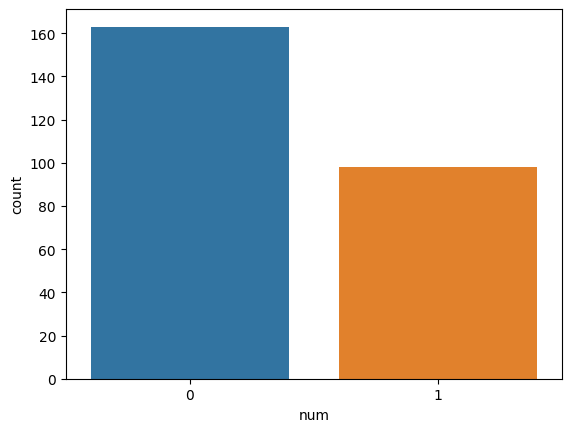

In [37]:
import seaborn as sns
sns.countplot(x='num', data=new_df)

- Numeric variables distribution

<AxesSubplot: xlabel='age', ylabel='Count'>

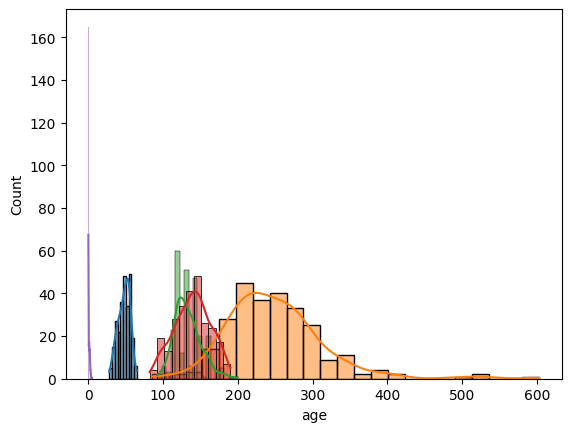

In [44]:
sns.histplot(new_df['age'], kde=True)
sns.histplot(new_df['chol'], kde=True)
sns.histplot(new_df['trestbps'], kde=True)
sns.histplot(new_df['thalach'], kde=True)
sns.histplot(new_df['oldpeak'], kde=True)


<AxesSubplot: xlabel='age', ylabel='Count'>

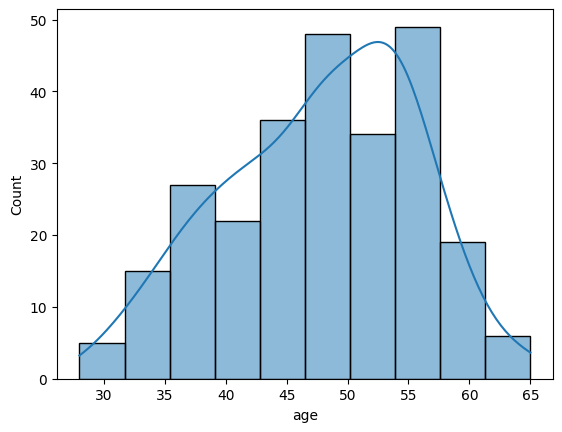

In [51]:
sns.histplot(new_df['age'], kde=True)

<AxesSubplot: xlabel='chol', ylabel='Count'>

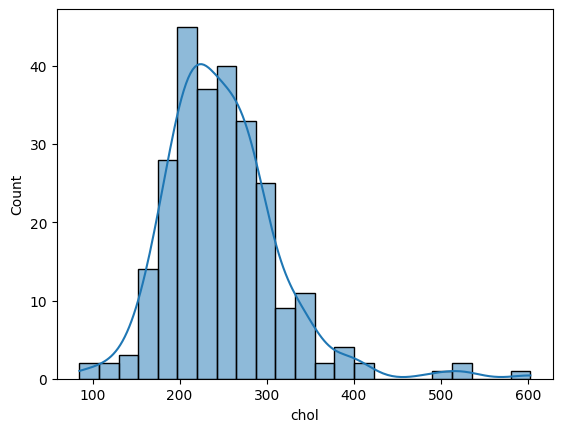

In [52]:
sns.histplot(new_df['chol'], kde=True)

- Categorical variables distribution

<AxesSubplot: xlabel='exang', ylabel='count'>

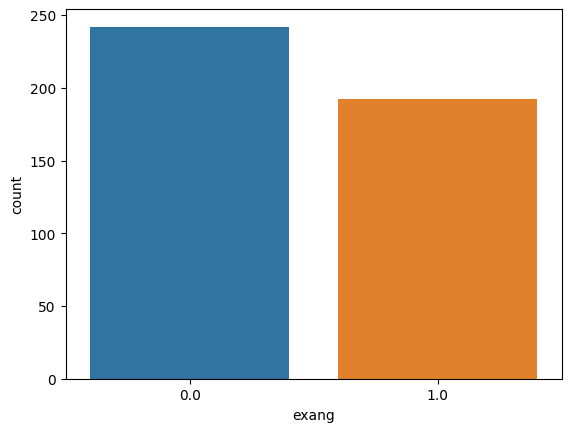

In [45]:
sns.countplot(x='sex', data=new_df)
sns.countplot(x='cp', data=new_df)
sns.countplot(x='fbs', data=new_df)
sns.countplot(x='restecg', data=new_df)
sns.countplot(x='exang', data=new_df)


<AxesSubplot: xlabel='sex', ylabel='count'>

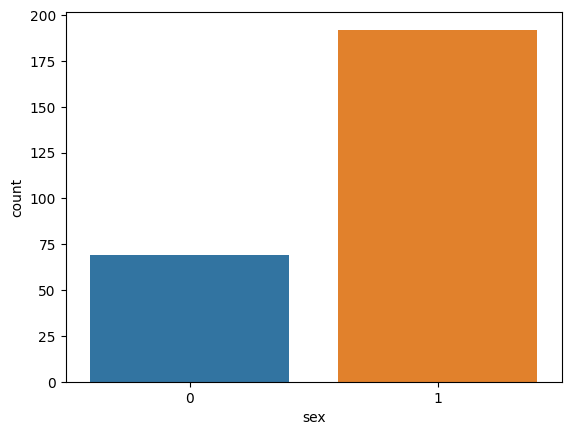

In [53]:
sns.countplot(x='sex', data=new_df)

<AxesSubplot: xlabel='cp', ylabel='count'>

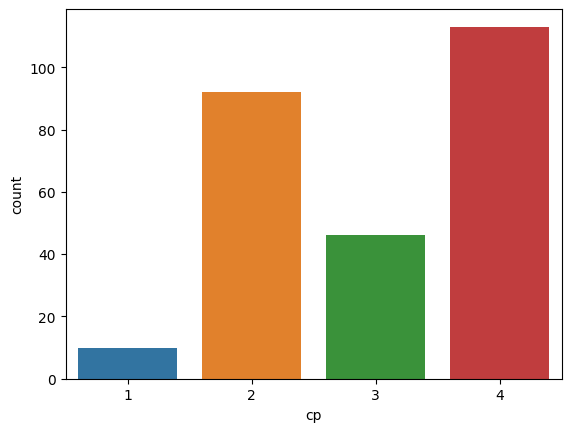

In [54]:
sns.countplot(x='cp', data=new_df)

<AxesSubplot: xlabel='fbs', ylabel='count'>

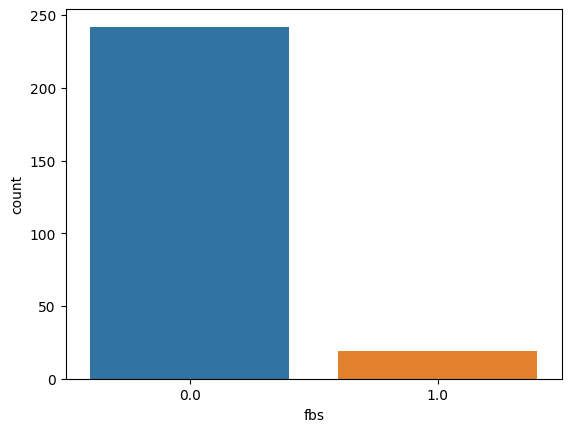

In [55]:
sns.countplot(x='fbs', data=new_df)

<AxesSubplot: xlabel='restecg', ylabel='count'>

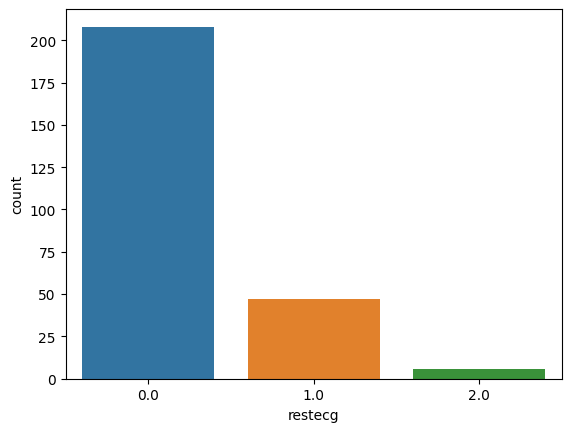

In [56]:
sns.countplot(x='restecg', data=new_df)

<AxesSubplot: xlabel='exang', ylabel='count'>

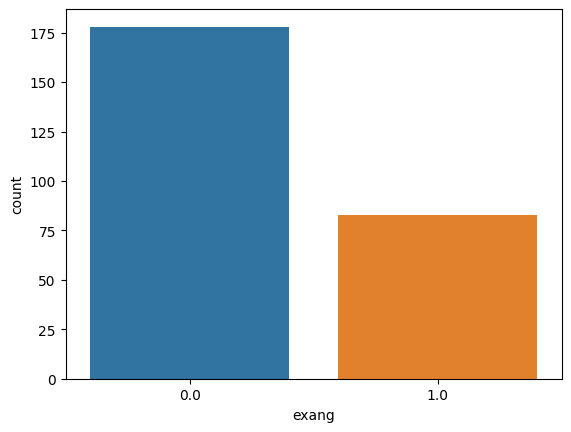

In [57]:
sns.countplot(x='exang', data=new_df)

- Correlation between variables

<AxesSubplot: >

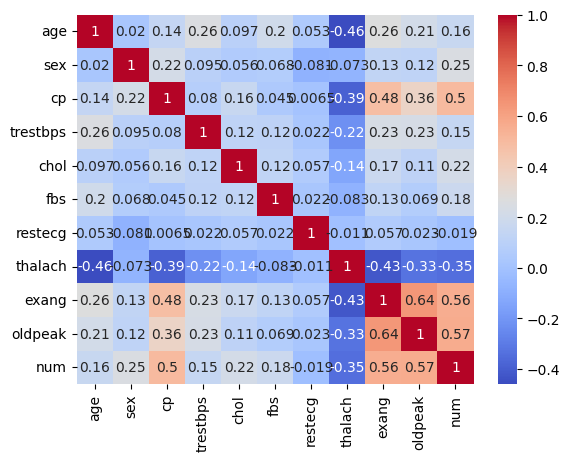

In [47]:
corr = new_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

- Pairplot

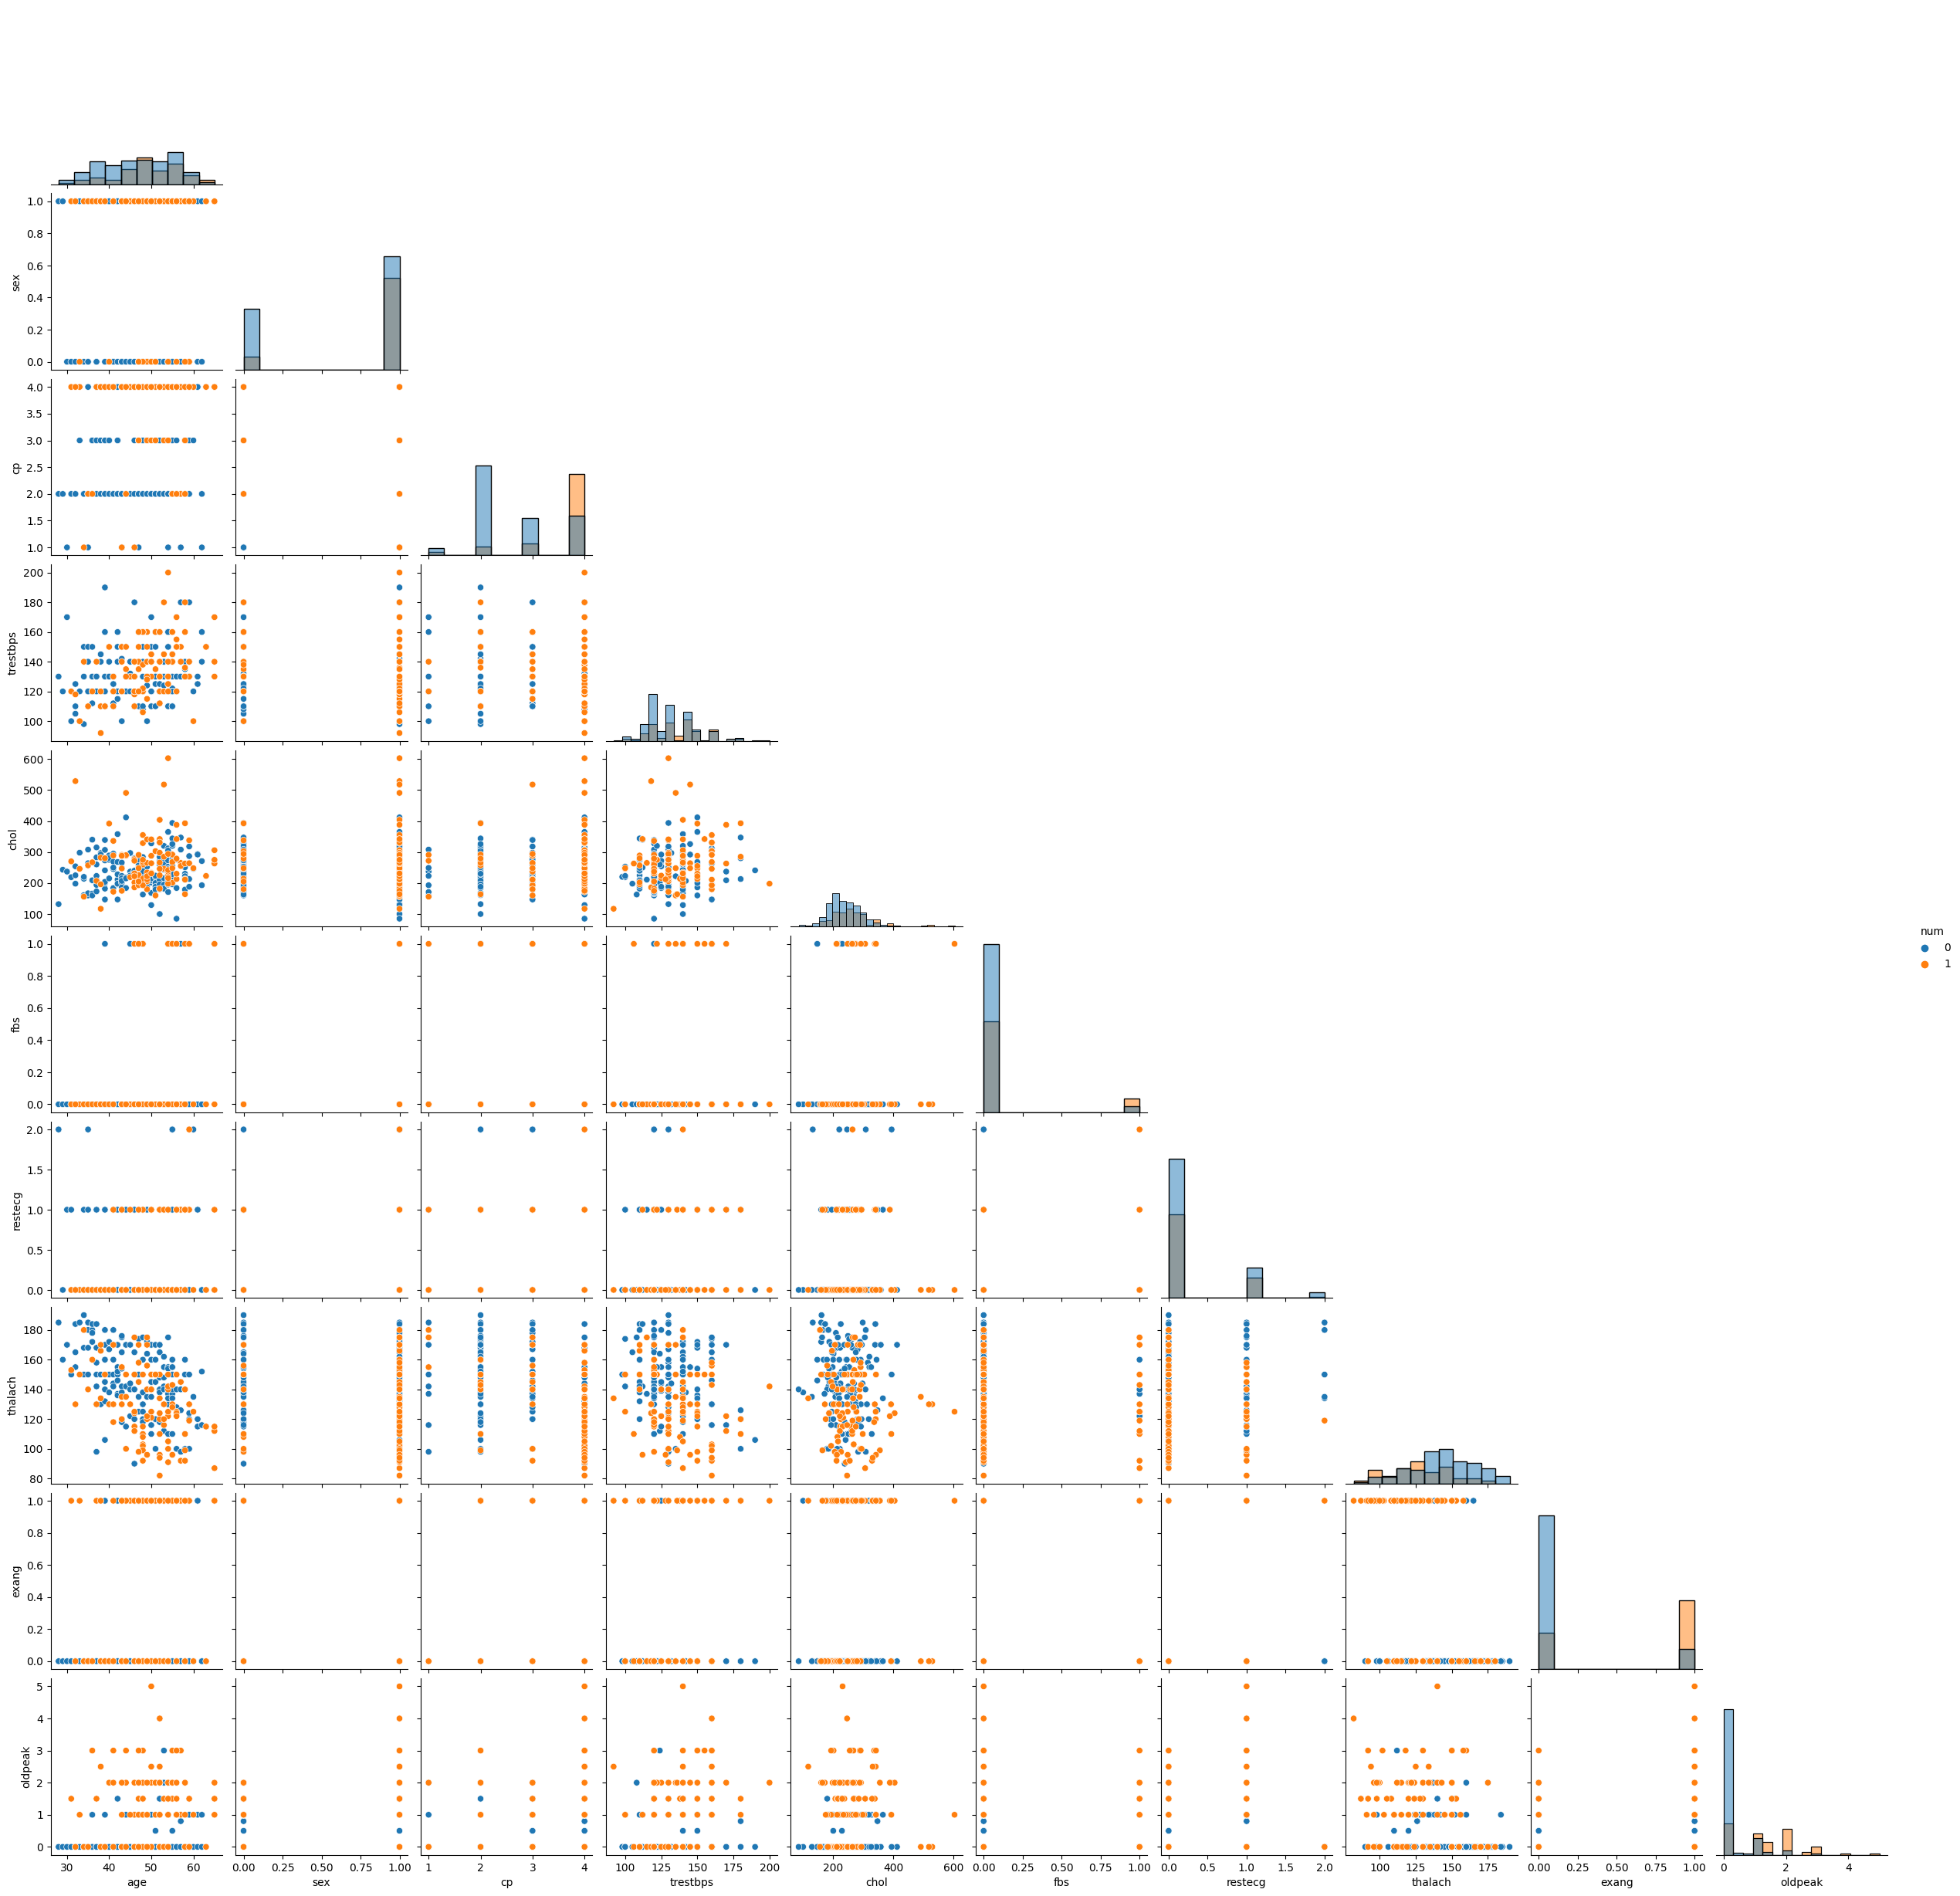

In [49]:
sns.pairplot(new_df, hue='num', diag_kind='hist', corner=True)

- Boxplots

<AxesSubplot: xlabel='num', ylabel='oldpeak'>

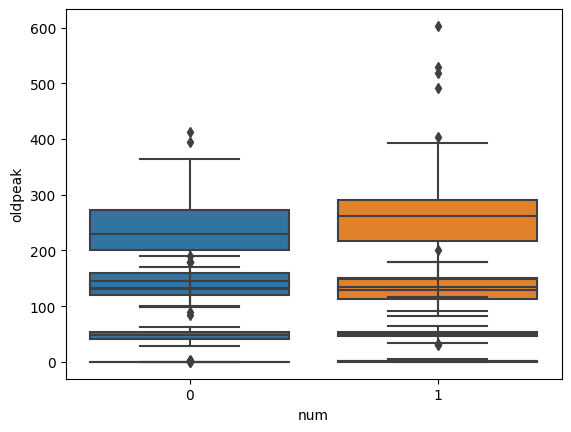

In [50]:
sns.boxplot(x='num', y='age', data=new_df)
sns.boxplot(x='num', y='chol', data=new_df)
sns.boxplot(x='num', y='trestbps', data=new_df)
sns.boxplot(x='num', y='thalach', data=new_df)
sns.boxplot(x='num', y='oldpeak', data=new_df)

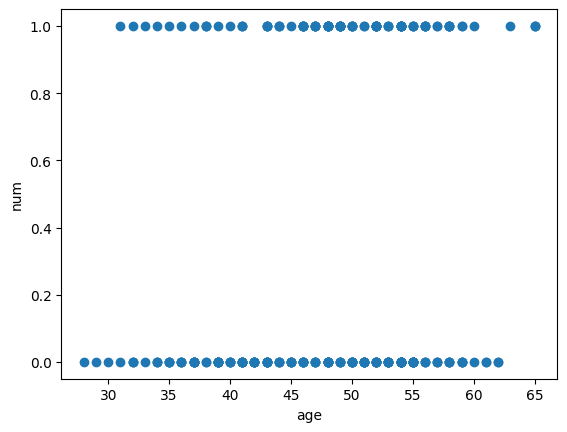

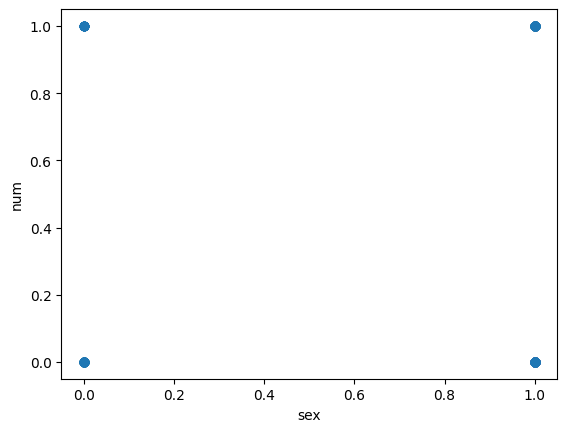

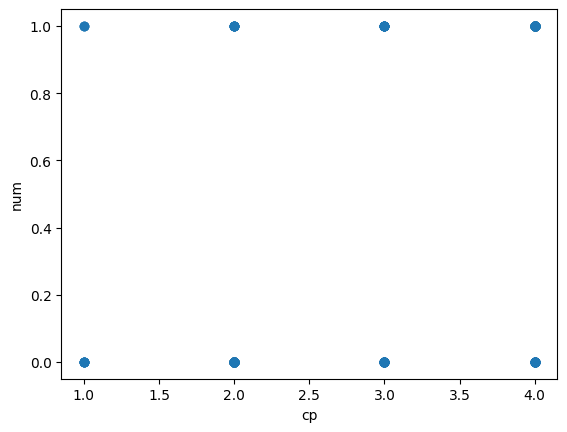

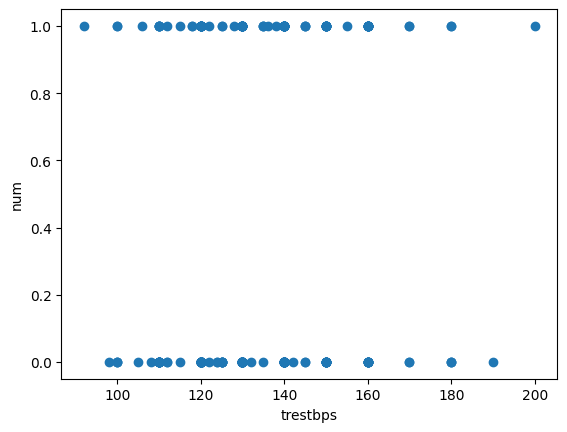

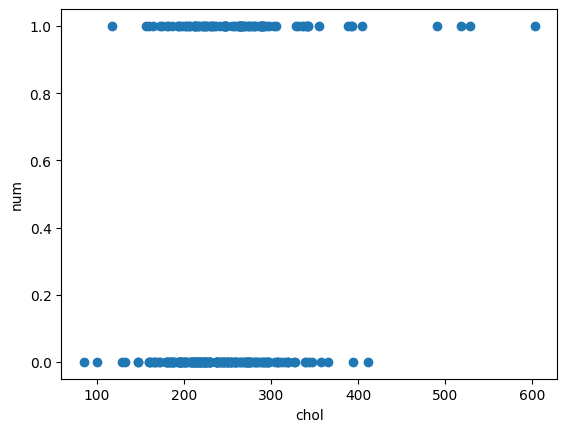

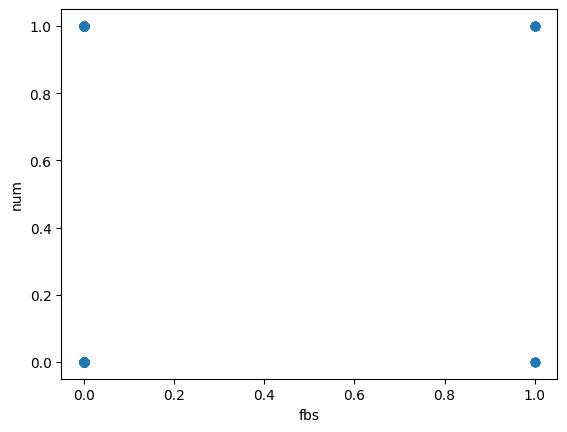

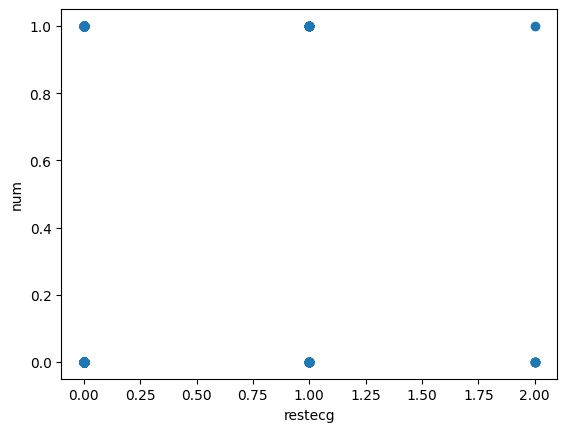

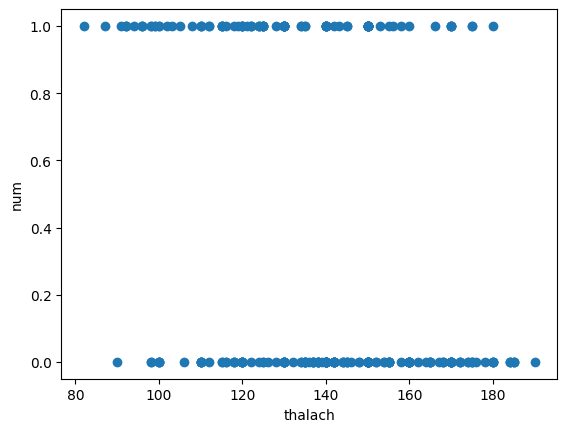

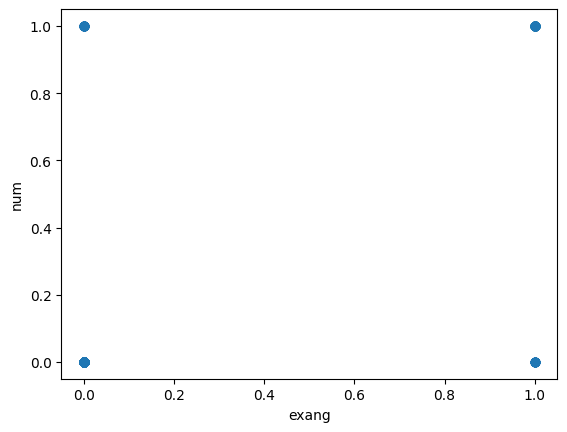

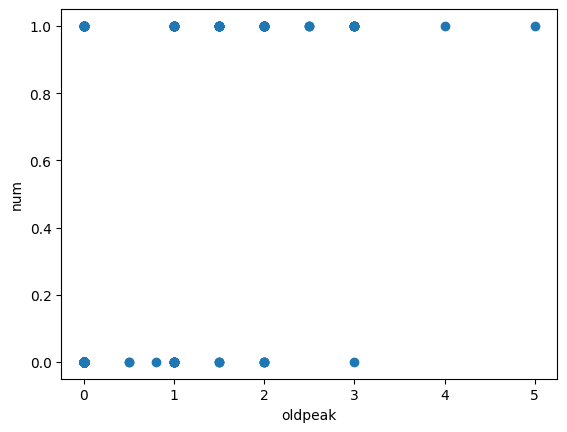

In [61]:
import matplotlib.pyplot as plt

for col in new_df.columns[:-1]:
    plt.scatter(new_df[col], new_df['num'])
    plt.xlabel(col)
    plt.ylabel('num')
    plt.show()

- We can use logistic regression because 

# cleveland dataset

In [24]:
df_cleve = pd.read_csv('processed.cleveland.data', sep=',', header=None, names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

In [25]:
df_cleve.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [26]:
df_cleve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [27]:
df_cleve.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


- We can see that all the parameters in cleveland dataset has values. Therefore we can use all the parameters.

# switzerland

In [28]:
df_swiss = pd.read_csv('processed.switzerland.data', sep=',', header=None, names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'], na_values=["?"])

In [29]:
df_swiss.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1
1,34,1,4,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3
3,36,1,4,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1
4,38,0,4,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2


In [30]:
df_swiss.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,123.000000,123.000000,123.000000,121.000000,123.0,48.000000,122.000000,122.000000,122.000000,117.000000,106.000000,5.000000,71.000000,123.000000
mean,55.317073,0.918699,3.699187,130.206612,0.0,0.104167,0.360656,121.557377,0.442623,0.653846,1.801887,1.600000,5.788732,1.804878
std,9.032108,0.274414,0.688726,22.559151,0.0,0.308709,0.590077,25.977438,0.498745,1.056061,0.623658,0.547723,1.731354,1.013503
min,32.000000,0.000000,1.000000,80.000000,0.0,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,1.000000,3.000000,0.000000
25%,51.000000,1.000000,4.000000,115.000000,0.0,0.000000,0.000000,104.250000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000
50%,56.000000,1.000000,4.000000,125.000000,0.0,0.000000,0.000000,121.000000,0.000000,0.300000,2.000000,2.000000,7.000000,2.000000
75%,61.500000,1.000000,4.000000,145.000000,0.0,0.000000,1.000000,140.000000,1.000000,1.500000,2.000000,2.000000,7.000000,3.000000
max,74.000000,1.000000,4.000000,200.000000,0.0,1.000000,2.000000,182.000000,1.000000,3.700000,3.000000,2.000000,7.000000,4.000000


- We can see that "ca" column has only 5 values. Therefore we can ignore that column.
- Even though "fbs" and "thal" columns have half of the values, we cannot use those columns in analysis because we don't have enough data in those columns.

# va

In [31]:
df_va = pd.read_csv('processed.va.data', sep=',', header=None, names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'], na_values=["?"])

In [32]:
df_va.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0


In [33]:
df_va.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,200.000000,200.000000,200.000000,144.000000,193.000000,193.000000,200.000000,147.000000,147.000000,144.000000,98.000000,2.0,34.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.352332,0.735000,122.795918,0.646259,1.320833,2.132653,0.0,6.294118,1.520000
std,7.811697,0.171015,0.795701,21.537733,114.035232,0.478939,0.683455,21.990328,0.479765,1.106236,0.667937,0.0,1.291685,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.0,3.000000,0.000000
25%,55.000000,1.000000,3.000000,120.000000,0.000000,0.000000,0.000000,109.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000
50%,60.000000,1.000000,4.000000,130.000000,216.000000,0.000000,1.000000,120.000000,1.000000,1.500000,2.000000,0.0,7.000000,1.000000
75%,64.000000,1.000000,4.000000,147.000000,258.000000,1.000000,1.000000,140.000000,1.000000,2.000000,3.000000,0.0,7.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,0.0,7.000000,4.000000


- Here we can see that "ca" column has only 2 values. Therefore we only consider other columns for analysis. We can remove the records with not enough values just like we did in the previous dataset.